# K-means & PCA assignment:

## Q2: Apply K means clustering to “credit card dataset: credit_card.csv”

In [5]:
#importing libraries and dataset
from sklearn.cluster import KMeans
from sklearn import preprocessing
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

dataset = pd.read_csv('./credit card.csv')

### a. Remove any null values by the mean.

In [6]:
# checking null values
dataset.isna().sum()
# filling null data with mean
dataset = dataset.fillna(dataset.mean())
# dropping cust_id feature
dataset.drop('CUST_ID', axis=1, inplace=True)
# dropping null values
dataset = dataset.dropna()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  after removing the cwd from sys.path.


### b. Use the elbow method to find a good number of clusters with the K-Means algorithm

In [19]:
# creating list to keep number of square and number of clusters
klist = []
# iterating 1 to 10 
for i in range(1,10):
  # using kmeans function on each iteration to get elbow 
  k = KMeans(n_clusters=i, random_state=0)
  k.fit(dataset)
  klist.append(k.inertia_)

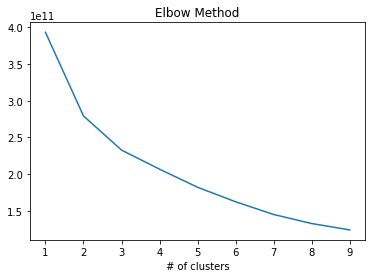

In [20]:
# visualizing the elbow method
plt.plot(range(1,10), klist)
plt.title('Elbow Method')
plt.xlabel('# of clusters')
plt.show()

### c. Calculate the silhouette score for the above clustering.


In [22]:
# using kmeans function with 3 clusters
k = KMeans(n_clusters=3, random_state=0) 
# fitting dataset
k.fit(dataset)
# calculating prediction
cluster = k.predict(dataset)
# calculating silhouette score
print("Score: {}".format(silhouette_score(dataset, cluster)))

Score: 0.46576680179286384


### d. Try feature scaling and then apply K-Means on the scaled features. Did that improve the Silhouette score?

In [25]:
# declaring standart scaler
sc = preprocessing.StandardScaler()
# fitting dataset
sc.fit(dataset)
s_array = sc.transform(dataset)
# creating dataframe 
ds = pd.DataFrame(s_array, columns=dataset.columns)
# using kmeans with 3 clusters
second_km = KMeans(n_clusters=3, random_state=0) 
# fitting dataset with kmeans
second_km.fit(ds)
# calculating prediction
cluster_kmeans = second_km.predict(ds)
# calculating silhouette score
print("Score with scaling: {}".format(silhouette_score(dataset, cluster_kmeans)))

Score with scaling: 0.33982977251183555


#### Sillhoutte score has not improved after using kmeans on the scaled features

### e. Apply PCA on the same dataset then apply K-Means algorithm on the PCA result and report your observation if the silhouette score improved or not.

In [29]:
# declaring PCA with 2
pca = PCA(n_components = 2)
# fit transform dataset, applying pca on the dataset
PCAds = pca.fit_transform(dataset)
# declaring kmeans with 3 clusters
third_km = KMeans(n_clusters=3, random_state=0)
# applying kmeans on pca
third_km.fit(PCAds)
# calculation prediction
PCAcluster = third_km.predict(PCAds)
# calculating silhouette score
print("Score without scaling: {}".format(silhouette_score(dataset, PCAcluster)))

Score without scaling: 0.47006546417792233


#### Sillhoutte score has improved after using kmeans on the PCA